In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0


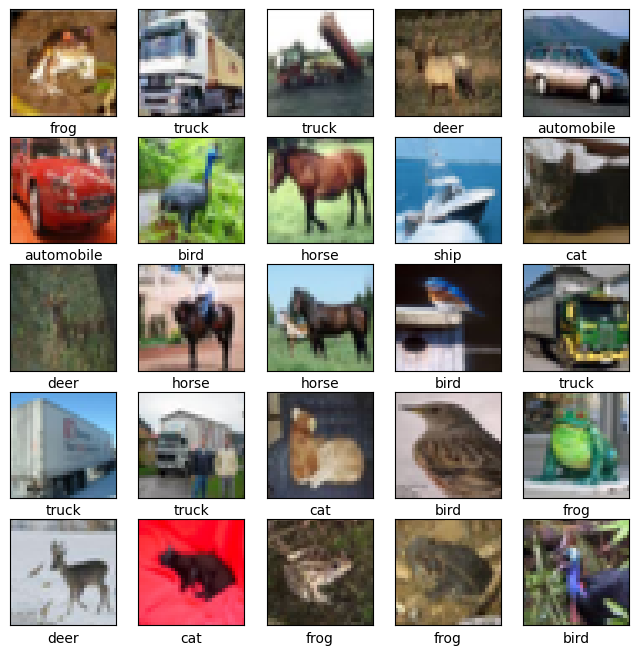

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()


In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels), batch_size = 128)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


391/391 ━━━━━━━━━━━━━━━━━━━━ 70s 172ms/step - accuracy: 0.2993 - loss: 1.8774 - val_accuracy: 0.4904 - val_loss: 1.3929
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 66s 169ms/step - accuracy: 0.5315 - loss: 1.3128 - val_accuracy: 0.5818 - val_loss: 1.1901
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 160ms/step - accuracy: 0.5964 - loss: 1.1464 - val_accuracy: 0.6076 - val_loss: 1.1201
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 158ms/step - accuracy: 0.6412 - loss: 1.0283 - val_accuracy: 0.6295 - val_loss: 1.0621
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 160ms/step - accuracy: 0.6634 - loss: 0.9557 - val_accuracy: 0.6631 - val_loss: 0.9781
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 156ms/step - accuracy: 0.6828 - loss: 0.9056 - val_accuracy: 0.6719 - val_loss: 0.9354
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 62s 159ms/step - accuracy: 0.7048 - loss: 0.8458 - val_accuracy: 0.6850 - val_loss: 0.9101
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 156ms/step - accuracy: 0.7225 - loss: 0.7932 - val

313/313 - 4s - 13ms/step - accuracy: 0.7125 - loss: 0.8411


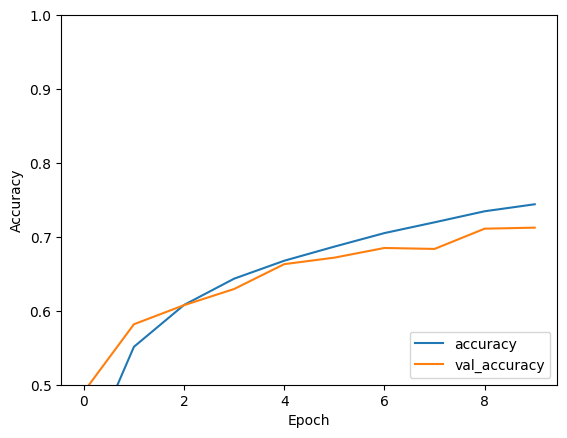

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [ ]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.7124999761581421
